In [1]:
import pandas as pd
import numpy as np
import warnings

In [5]:
 homework = pd.read_csv("football-managers-workfile_p.csv", encoding="utf-8")
    # reading csv file

In [7]:
homework.describe()

,season,gameno,home,points,goals,points_opponent,goals_opponent,hometeam_uid,awayteam_uid,manager_id,caretaker,points_lastseason
count,8360.000000,8360.000000,8360.00000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,7714.000000
mean,2013.000000,19.500000,0.50000,1.375957,1.362919,1.375957,1.362919,19.495455,19.495455,125.913158,0.017225,54.000000
std,3.162467,10.966512,0.50003,1.318578,1.253248,1.318578,1.253248,10.302645,10.302645,72.178779,0.130116,16.648983
min,2008.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,25.000000
25%,2010.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,58.000000,0.000000,41.000000
50%,2013.000000,19.500000,0.50000,1.000000,1.000000,1.000000,1.000000,19.000000,19.000000,143.000000,0.000000,47.000000
75%,2016.000000,29.000000,1.00000,3.000000,2.000000,3.000000,2.000000,29.000000,29.000000,193.000000,0.000000,66.000000
max,2018.000000,38.000000,1.00000,3.000000,9.000000,3.000000,9.000000,36.000000,36.000000,262.000000,1.000000,100.000000


In [8]:
homework.describe().transpose() # illustrating statistical table in appropriate way

,count,mean,std,min,25%,50%,75%,max
season,8360.0,2013.000000,3.162467,2008.0,2010.0,2013.0,2016.0,2018.0
gameno,8360.0,19.500000,10.966512,1.0,10.0,19.5,29.0,38.0
home,8360.0,0.500000,0.500030,0.0,0.0,0.5,1.0,1.0
points,8360.0,1.375957,1.318578,0.0,0.0,1.0,3.0,3.0
goals,8360.0,1.362919,1.253248,0.0,0.0,1.0,2.0,9.0
points_opponent,8360.0,1.375957,1.318578,0.0,0.0,1.0,3.0,3.0
goals_opponent,8360.0,1.362919,1.253248,0.0,0.0,1.0,2.0,9.0
hometeam_uid,8360.0,19.495455,10.302645,1.0,12.0,19.0,29.0,36.0
awayteam_uid,8360.0,19.495455,10.302645,1.0,12.0,19.0,29.0,36.0
manager_id,8360.0,125.913158,72.178779,1.0,58.0,143.0,193.0,262.0


In [9]:
homework.shape 
# this shows how many variables and observations we have currently

(8360, 19)

In [10]:
homework.filter(["goals", "points", "points_lastseason"]).describe().transpose() # filtering only chosen variables

,count,mean,std,min,25%,50%,75%,max
goals,8360.0,1.362919,1.253248,0.0,0.0,1.0,2.0,9.0
points,8360.0,1.375957,1.318578,0.0,0.0,1.0,3.0,3.0
points_lastseason,7714.0,54.000000,16.648983,25.0,41.0,47.0,66.0,100.0


In [11]:
homework["goals"].isnull().sum() # checking for missing values

0

In [12]:
homework["points"].isnull().sum()

0

In [13]:
homework["points_lastseason"].isnull().sum()

646

In [15]:
homework.loc[homework["points_lastseason"].isnull()] # this shows where are missing values located

,div,season,date,team,gameno,home,points,goals,team_opponent,points_opponent,goals_opponent,hometeam_uid,awayteam_uid,manager_name,manager_id,caretaker,date_from,date_until,points_lastseason
950,E0,2010,2010-08-14,Blackpool,1,0,3.0,4.0,Wigan,0.0,0.0,35,5,Ian Holloway,102,0,2009-05-21,2012-11-03,NaN
951,E0,2010,2010-08-21,Blackpool,2,0,0.0,0.0,Arsenal,3.0,6.0,1,5,Ian Holloway,102,0,2009-05-21,2012-11-03,NaN
952,E0,2010,2010-08-28,Blackpool,3,1,1.0,2.0,Fulham,1.0,2.0,5,14,Ian Holloway,102,0,2009-05-21,2012-11-03,NaN
953,E0,2010,2010-09-11,Blackpool,4,0,3.0,2.0,Newcastle,0.0,0.0,22,5,Ian Holloway,102,0,2009-05-21,2012-11-03,NaN
954,E0,2010,2010-09-19,Blackpool,5,0,0.0,0.0,Chelsea,3.0,4.0,11,5,Ian Holloway,102,0,2009-05-21,2012-11-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,E0,2009,2010-04-11,Wolves,34,1,1.0,0.0,Stoke,1.0,0.0,36,28,Mick McCarthy,152,0,2006-08-05,2012-02-14,NaN
8242,E0,2009,2010-04-17,Wolves,35,0,1.0,0.0,Fulham,1.0,0.0,14,36,Mick McCarthy,152,0,2006-08-05,2012-02-14,NaN
8243,E0,2009,2010-04-24,Wolves,36,1,1.0,1.0,Blackburn,1.0,1.0,36,4,Mick McCarthy,152,0,2006-08-05,2012-02-14,NaN
8244,E0,2009,2010-05-01,Wolves,37,0,0.0,1.0,Portsmouth,3.0,3.0,24,36,Mick McCarthy,152,0,2006-08-05,2012-02-14,NaN


In [16]:
homework = homework.loc[homework["points_lastseason"].notnull()] # deleting missing values

In [17]:
homework["points_lastseason"].isnull().sum()

0

In [19]:
homework.drop(
    columns=[
        "div",
        "caretaker",
        "hometeam_uid",
        "awayteam_uid"
    ],
    inplace=True,
)
# i am dropping variables which are not useful 

In [20]:
homework.shape

(7714, 15)

In [32]:
for date, team, points, team_opponent in zip(homework["date"], homework["team"], homework["points"], homework["team_opponent"]):
    if points == 3:
        print(f" in {date} {team} has won against {team_opponent}")
    elif points == 1:
        print(f"in {date} {team} got draw with {team_opponent}")
    else:
        print(f"in {date} {team} has lost to {team_opponent}")
# creating automative repeating task teams with its points  against its opponent teams

 in 2008-08-16 Arsenal has won against West Brom
in 2008-08-23 Arsenal has lost to Fulham
 in 2008-08-30 Arsenal has won against Newcastle
 in 2008-09-13 Arsenal has won against Blackburn
 in 2008-09-20 Arsenal has won against Bolton
in 2008-09-27 Arsenal has lost to Hull
in 2008-10-04 Arsenal got draw with Sunderland
 in 2008-10-18 Arsenal has won against Everton
 in 2008-10-26 Arsenal has won against West Ham
in 2008-10-29 Arsenal got draw with Tottenham
in 2008-11-01 Arsenal has lost to Stoke
 in 2008-11-08 Arsenal has won against Man United
in 2008-11-15 Arsenal has lost to Aston Villa
in 2008-11-22 Arsenal has lost to Man City
 in 2008-11-30 Arsenal has won against Chelsea
 in 2008-12-06 Arsenal has won against Wigan
in 2008-12-13 Arsenal got draw with Middlesbrough
in 2008-12-21 Arsenal got draw with Liverpool
in 2008-12-26 Arsenal got draw with Aston Villa
 in 2008-12-28 Arsenal has won against Portsmouth
 in 2009-01-10 Arsenal has won against Bolton
 in 2009-01-17 Arsenal has w

in 2010-09-18 Birmingham has lost to West Brom
in 2010-09-25 Birmingham got draw with Wigan
in 2010-10-02 Birmingham has lost to Everton
in 2010-10-16 Birmingham has lost to Arsenal
 in 2010-10-23 Birmingham has won against Blackpool
in 2010-10-31 Birmingham got draw with Aston Villa
in 2010-11-06 Birmingham got draw with West Ham
in 2010-11-09 Birmingham has lost to Stoke
in 2010-11-13 Birmingham got draw with Man City
 in 2010-11-20 Birmingham has won against Chelsea
in 2010-11-27 Birmingham got draw with Fulham
in 2010-12-04 Birmingham got draw with Tottenham
in 2010-12-12 Birmingham has lost to Wolves
in 2010-12-28 Birmingham got draw with Man United
in 2011-01-01 Birmingham has lost to Arsenal
 in 2011-01-04 Birmingham has won against Blackpool
in 2011-01-16 Birmingham got draw with Aston Villa
in 2011-01-22 Birmingham has lost to Man United
in 2011-02-02 Birmingham got draw with Man City
 in 2011-02-06 Birmingham has won against West Ham
 in 2011-02-12 Birmingham has won against 

in 2014-12-26 Crystal Palace has lost to Southampton
in 2014-12-28 Crystal Palace got draw with QPR
in 2015-01-01 Crystal Palace got draw with Aston Villa
 in 2015-01-10 Crystal Palace has won against Tottenham
 in 2015-01-17 Crystal Palace has won against Burnley
in 2015-01-31 Crystal Palace has lost to Everton
 in 2015-02-07 Crystal Palace has won against Leicester
in 2015-02-11 Crystal Palace got draw with Newcastle
in 2015-02-21 Crystal Palace has lost to Arsenal
 in 2015-02-28 Crystal Palace has won against West Ham
in 2015-03-03 Crystal Palace has lost to Southampton
 in 2015-03-14 Crystal Palace has won against QPR
 in 2015-03-21 Crystal Palace has won against Stoke
 in 2015-04-06 Crystal Palace has won against Man City
 in 2015-04-11 Crystal Palace has won against Sunderland
in 2015-04-18 Crystal Palace has lost to West Brom
in 2015-04-25 Crystal Palace has lost to Hull
in 2015-05-03 Crystal Palace has lost to Chelsea
in 2015-05-09 Crystal Palace has lost to Man United
 in 2015

in 2019-05-12 Leicester got draw with Chelsea
 in 2008-08-16 Liverpool has won against Sunderland
 in 2008-08-23 Liverpool has won against Middlesbrough
in 2008-08-31 Liverpool got draw with Aston Villa
 in 2008-09-13 Liverpool has won against Man United
in 2008-09-20 Liverpool got draw with Stoke
 in 2008-09-27 Liverpool has won against Everton
 in 2008-10-05 Liverpool has won against Man City
 in 2008-10-18 Liverpool has won against Wigan
 in 2008-10-26 Liverpool has won against Chelsea
 in 2008-10-29 Liverpool has won against Portsmouth
in 2008-11-01 Liverpool has lost to Tottenham
 in 2008-11-08 Liverpool has won against West Brom
 in 2008-11-15 Liverpool has won against Bolton
in 2008-11-22 Liverpool got draw with Fulham
in 2008-12-01 Liverpool got draw with West Ham
 in 2008-12-06 Liverpool has won against Blackburn
in 2008-12-13 Liverpool got draw with Hull
in 2008-12-21 Liverpool got draw with Arsenal
 in 2008-12-26 Liverpool has won against Bolton
 in 2008-12-28 Liverpool has 

in 2018-08-25 Man City got draw with Wolves
 in 2018-09-01 Man City has won against Newcastle
 in 2018-09-15 Man City has won against Fulham
 in 2018-09-22 Man City has won against Cardiff
 in 2018-09-29 Man City has won against Brighton
in 2018-10-07 Man City got draw with Liverpool
 in 2018-10-20 Man City has won against Burnley
 in 2018-10-29 Man City has won against Tottenham
 in 2018-11-04 Man City has won against Southampton
 in 2018-11-11 Man City has won against Man United
 in 2018-11-24 Man City has won against West Ham
 in 2018-12-01 Man City has won against Bournemouth
 in 2018-12-04 Man City has won against Watford
in 2018-12-08 Man City has lost to Chelsea
 in 2018-12-15 Man City has won against Everton
in 2018-12-22 Man City has lost to Crystal Palace
in 2018-12-26 Man City has lost to Leicester
 in 2018-12-30 Man City has won against Southampton
 in 2019-01-03 Man City has won against Liverpool
 in 2019-01-14 Man City has won against Wolves
 in 2019-01-20 Man City has wo

 in 2012-01-02 Stoke has won against Blackburn
in 2012-01-14 Stoke got draw with Liverpool
in 2012-01-21 Stoke has lost to West Brom
in 2012-01-31 Stoke has lost to Man United
in 2012-02-04 Stoke has lost to Sunderland
in 2012-02-11 Stoke has lost to Fulham
 in 2012-02-26 Stoke has won against Swansea
 in 2012-03-03 Stoke has won against Norwich
in 2012-03-10 Stoke has lost to Chelsea
in 2012-03-21 Stoke got draw with Tottenham
in 2012-03-24 Stoke got draw with Man City
in 2012-03-31 Stoke has lost to Wigan
 in 2012-04-07 Stoke has won against Wolves
in 2012-04-09 Stoke got draw with Aston Villa
in 2012-04-21 Stoke has lost to Newcastle
in 2012-04-28 Stoke got draw with Arsenal
in 2012-05-01 Stoke got draw with Everton
in 2012-05-06 Stoke has lost to QPR
in 2012-05-13 Stoke got draw with Bolton
in 2012-08-18 Stoke got draw with Reading
in 2012-08-26 Stoke got draw with Arsenal
in 2012-09-01 Stoke got draw with Wigan
in 2012-09-15 Stoke got draw with Man City
in 2012-09-22 Stoke has los

 in 2014-01-11 Tottenham has won against Crystal Palace
 in 2014-01-19 Tottenham has won against Swansea
in 2014-01-29 Tottenham has lost to Man City
in 2014-02-01 Tottenham got draw with Hull
 in 2014-02-09 Tottenham has won against Everton
 in 2014-02-12 Tottenham has won against Newcastle
in 2014-02-23 Tottenham has lost to Norwich
 in 2014-03-02 Tottenham has won against Cardiff
in 2014-03-08 Tottenham has lost to Chelsea
in 2014-03-16 Tottenham has lost to Arsenal
 in 2014-03-23 Tottenham has won against Southampton
in 2014-03-30 Tottenham has lost to Liverpool
 in 2014-04-07 Tottenham has won against Sunderland
in 2014-04-12 Tottenham got draw with West Brom
 in 2014-04-19 Tottenham has won against Fulham
 in 2014-04-26 Tottenham has won against Stoke
in 2014-05-03 Tottenham has lost to West Ham
 in 2014-05-11 Tottenham has won against Aston Villa
 in 2014-08-16 Tottenham has won against West Ham
 in 2014-08-24 Tottenham has won against QPR
in 2014-08-31 Tottenham has lost to Liv

 in 2018-09-16 West Ham has won against Everton
in 2018-09-23 West Ham got draw with Chelsea
 in 2018-09-29 West Ham has won against Man United
in 2018-10-05 West Ham has lost to Brighton
in 2018-10-20 West Ham has lost to Tottenham
in 2018-10-27 West Ham got draw with Leicester
 in 2018-11-03 West Ham has won against Burnley
in 2018-11-10 West Ham got draw with Huddersfield
in 2018-11-24 West Ham has lost to Man City
 in 2018-12-01 West Ham has won against Newcastle
 in 2018-12-04 West Ham has won against Cardiff
 in 2018-12-08 West Ham has won against Crystal Palace
 in 2018-12-15 West Ham has won against Fulham
in 2018-12-22 West Ham has lost to Watford
 in 2018-12-27 West Ham has won against Southampton
in 2018-12-30 West Ham has lost to Burnley
in 2019-01-02 West Ham got draw with Brighton
 in 2019-01-12 West Ham has won against Arsenal
in 2019-01-19 West Ham has lost to Bournemouth
in 2019-01-29 West Ham has lost to Wolves
in 2019-02-04 West Ham got draw with Liverpool
in 2019-02

In [31]:
new_list = homework.columns.tolist()
print(new_list)

['season', 'date', 'team', 'gameno', 'home', 'points', 'goals', 'team_opponent', 'points_opponent', 'goals_opponent', 'manager_name', 'manager_id', 'date_from', 'date_until', 'points_lastseason']


<AxesSubplot:>

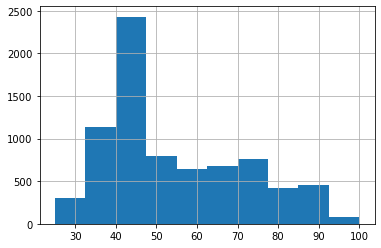

In [33]:
homework.points_lastseason.hist() # drawing histogram

In [34]:
homework.to_csv("football-managers-workfile_p.csv", index=False)# saving my data